<h2>Cài đặt các thư viện cần thiết</h2>

Scikit-learn cần các package sau:
<ul>
	<li>Python (>= 2.6 or >= 3.3),</li>
	<li>NumPy (>= 1.6.1),</li>
	<li>SciPy (>= 0.9).</li>
</ul>

<h2>Phát sinh tập dữ liệu mẫu</h2>

Để phát sinh tập dữ liệu mẫu, ta có thể sử dụng hàm <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moons</a> trong scikit-learn. Đây là một hàm đơn giản để phát sinh dữ liệu cho các tác vụ mô phỏng clustering hay classification.

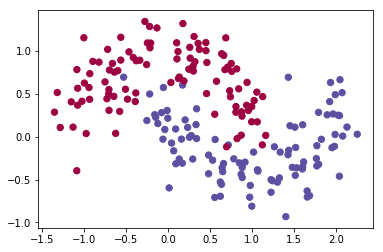

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

Quan sát tập dữ liệu trên, ta giả sử các chấm điểm màu đỏ tượng trưng cho các bệnh nhân nữ, các chấm điểm màu xanh tượng trưng cho các bệnh nhân nam, hai trục tọa độ x, y tượng trưng cho các chỉ số chẩn đoán bệnh.

Nhiệm vụ của chúng ta là xây dựng một mô hình phân lớp nhị phân để dự đoán chính xác một mẫu dữ liệu mới thuộc về bệnh nhân nam hay bệnh nhân nữ khi cho trước các chỉ số chẩn đoán x, y.

Nếu sử dụng linear classifier như Logistic regression, ta có thể thấy mô hình này không thể nào hoàn toàn phân lớp chính xác tập dữ liệu đã cho chỉ bằng một đường thẳng. Để nâng độ chính xác cho mô hình dạng này, ta cần phải thực hiện lựa chọn và rút trích các feature thích hợp. Ngược lại, ta có thể thấy ngay ưu điểm của Neural Network. Ta không cần sử dụng đến kĩ thuật <a href="https://ongxuanhong.wordpress.com/2015/10/29/feature-engineering-la-gi/" target="_blank" rel="noopener noreferrer">feature engineering</a>. Các hidden layer trong Neural Network sẽ đóng vai trò là các feature mà mô hình này "tự học" được trong quá trình huấn luyện.

<h2>Logistic Regression</h2>

Để minh họa những điều nêu trên, ta sẽ cài đặt mô hình Logistic regression để phân lớp tập dữ liệu đã phát sinh. Đầu vào sẽ là cặp giá trị (x, y), đầu ra là lớp dự đoán (0 hoặc 1). Ta có thể sử dụng class LogisticRegression của scikit-learn để cài đặt.



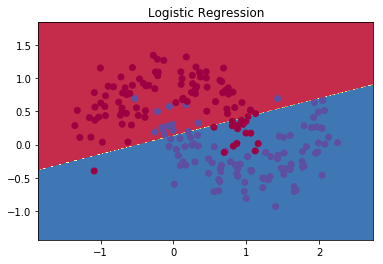

In [2]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Train the logistic rgeression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

Biểu đồ trên cho ta thấy đường biên phân lớp (decision boundary) của Logistic regression. Mô hình này mặc dù đã cố gắng phân lớp tốt nhất tập dữ liệu đã cho với một đường thẳng nhưng vẫn không thể nào nắm bắt (generalization/capture) được toàn bộ đặc điểm (moon shape) của tập dữ liệu đã phát sinh.
<blockquote>

<p><strong>Strengths:</strong> cho kết quả output là xác suất phân lớp của một đối tượng, thuật toán có thể được regularized để tránh overfitting. có thể dễ dàng cập nhật với dữ liệu mới bằng cách sử dụng stochastic gradient descent.</p>

<p><strong>Weaknesses:</strong> hiệu suất bị giảm khi dữ liệu có nhiều non-linear decision boundaries. Không đủ flexible để capture các pattern phức tạp hơn</p>

</blockquote>

<h2>Training Neural Network</h2>

Tiếp theo, ta sẽ xây dựng mô hình mạng nơ-ron với 3 layer: input layer, hidden layer, và output layer. Input layer có 2 node tương đương với 2 feature đầu vào x, y của tập dữ liệu. Output layer có 2 node tương đương với 2 class bệnh nhân nam (1) và bệnh nhân nữ (0).

Ta có thể điều chỉnh tuỳ ý số node ở hidden layer. Tuy nhiên, số node ở hidden layer càng nhiều, nghĩa là số chiều của feature càng lớn thì chi phí tính toán sẽ tăng lên, thời gian hội tụ của hàm gradient descent để tìm được thông số cho mô hình sẽ lâu hơn. Để chọn được số node ở hidden layer là một nghệ thuật và tuỳ theo bài toán cụ thể mà chúng ta đặt ra. Ta sẽ thực nghiệm với số node ở hidden layer lần lượt là 1, 2, 3, 4, 5, 20, 50 để theo dõi được hiệu suất của từng trường hợp.

Activation function là hàm nhận vector đầu vào, sau đó biến đổi để trả về vector đầu ra. Có nhiều hàm activation function như <a href="https://reference.wolfram.com/language/ref/Tanh.html">tanh</a>, <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid function</a>, hay <a href="https://en.wikipedia.org/wiki/Rectifier_(neural_networks">ReLUs</a>. Trong thực nghiệm này, ta sẽ dùng hàm tanh. Hàm này hữu dụng trong một vài trường hợp. Ví dụ, đạo hàm của $tanh(x)$ là $1 - tanh(x)^2$, như vậy ta chỉ cần tính $tanh(x)$ là có thể sử dụng tiếp giá trị này cho đạo hàm bậc nhất.

Do ta cần giá trị đầu ra là xác suất trong khoảng [0, 1] nên ta sẽ sử dụng hàm <a href="https://en.wikipedia.org/wiki/Softmax_function">softmax</a> để làm activation function của output layer.
<h3>Neural Network dự đoán như thế nào</h3>

Mạng nơ-ron của chúng ta dự đoán dựa trên forward propagation là các phép nhân ma trận cùng với activation function để thu được kết quả đầu ra. Nếu input x là vector 2 chiều thì ta có thể tính kết quả dự đoán $\hat{y} $ bằng công thức sau:

$$z_1 = xW_1 + b_1$$
$$a_1 = tanh(z_1)$$
$$z_2 = a_1W_2 + b_2$$
$$a_2 = \hat{y} = softmax(z_2)$$

Trong đó, $z_i$ là input của layer thứ $i$, $a_i$ là output của layer thứ $i$ sau khi áp dụng activation function. $W_1, b_1, W_2, b_2$ là các thông số (parameters) cần tìm của mô hình mạng nơ-ron.
<h3>Huấn luyện để tìm các thông số cho mô hình</h3>

Huấn luyện để tìm các thông số cho mô hình tương đương với việc tìm các thông số $W_1, b_1, W_2, b_2$, sao cho độ lỗi của mô hình đạt được là thấp nhất. Ta gọi hàm độ lỗi của mô hình là <i>loss function</i>. Đối với softmax function, ta dùng <a href="https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression">cross-entropy loss</a> (còn gọi là negative log likelihood).

Nếu ta có N dòng dữ liệu huấn luyện, và C nhóm phân lớp (trường hợp này là hai lớp nam, nữ), khi đó loss function giữa giá trị dự đoán $\hat{y}$ và $y$ được tính như sau:

$$L(y, \hat{y}) = -\frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n, i} \log \hat{y}_{n, i}$$

Ý nghĩa công thức trên nghĩa là: lấy tổng trên toàn bộ tập huấn luyện và cộng dồn vào hàm loss nếu kết quả phân lớp sai. Độ dị biệt giữa hai giá trị $y$ và $\hat{y}$ càng lớn thì độ lỗi càng cao. Mục tiêu của chúng ta là tối thiểu hóa hàm lỗi này. Ta có thể sử dụng phương pháp <a href="http://cs231n.github.io/optimization-1/">gradient descent</a> để tối tiểu hóa hàm lỗi. Có hai loại gradient descent, một loại với fixed learning rate được gọi là batch gradient descent, loại còn lại có learning rate thay đổi theo quá trình huấn luyện được gọi là SGD (stochastic gradient descent) hay <a href="http://cs231n.github.io/neural-networks-3/#anneal" target="_blank" rel="noopener noreferrer">minibatch gradient descent</a>.

Gradient descent cần các gradient là các vector có được bằng cách lấy đạo hàm của loss function theo từng thông số $\frac{\partial L}{\partial W_1}$, $\frac{\partial L}{\partial b_1}$, $\frac{\partial L}{\partial W_2}$, $\frac{\partial L}{\partial b_2}$. Để tính các gradient này, ta sử dụng thuật toán <em>backpropagation (lan truyền ngược). </em>Đây là cách hiệu quả để tính gradient khởi điểm từ output layer. Ta có thể tìm hiểu thêm về backpropagation ở một trong hai link sau: <a href="http://colah.github.io/posts/2015-08-Backprop/" target="_blank" rel="noopener noreferrer">Calculus on Computational Graphs: Backpropagation</a>, <a href="http://cs231n.github.io/optimization-2/#intuitive" target="_blank" rel="noopener noreferrer">Intuitive understanding of backpropagation</a>.

Áp dụng backpropagation ta có các đại lượng:

$$\delta_3 = y - \hat{y}$$
$$\delta_2 = (1 - tanh^2 z_1) \circ\delta_3W^T_2$$
$$\frac{\partial L}{\partial W_2} = a^T_1\delta_3$$
$$\frac{\partial L}{\partial b_2} = \delta_3$$
$$\frac{\partial L}{\partial W_1} = x^T\delta_2$$
$$\frac{\partial L}{\partial b_1} = \delta_2$$

<h2>Tiến hành cài đặt</h2>

Đầu tiên, ta sẽ khai báo một số biến cho gradient descent

In [3]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

Tiếp theo, ta sẽ định nghĩa loss function để đánh giá mô hình mạng nơ-ron.

In [4]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

Đồng thời, ta cũng định nghĩa hàm predict để dự đoán kết quả đầu ra

In [5]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Cuối cùng, ta tiến hành cài đặt hàm huấn luyện mô hình mạng nơ-ron. Trong thực nghiệm này, ta sử dụng batch gradient descent với backpropagation đã nêu ở trên


In [6]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %i: %f" % (i, calculate_loss(model))

    return model

<h2>Chạy thực nghiệm</h2>

Ta xem điều gì sẽ xảy ra nếu ta huấn luyện mạng nơ-ron với 3 node ở hidden layer.


Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068934
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


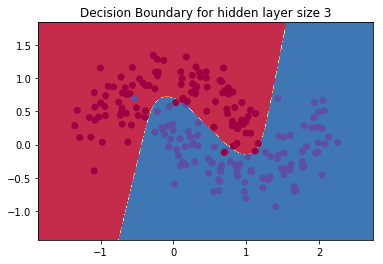

In [7]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

Ta có thể thấy mô hình mạng nơ-ron tìm được đường biên phân lớp khá hoàn chỉnh. Để quan sát những khác biệt khi thay đổi số lượng node ở hidden layer, ta tiến hành thực nghiệm với số lượng node lần lượt là 1, 2, 3, 4, 5, 20, 50.


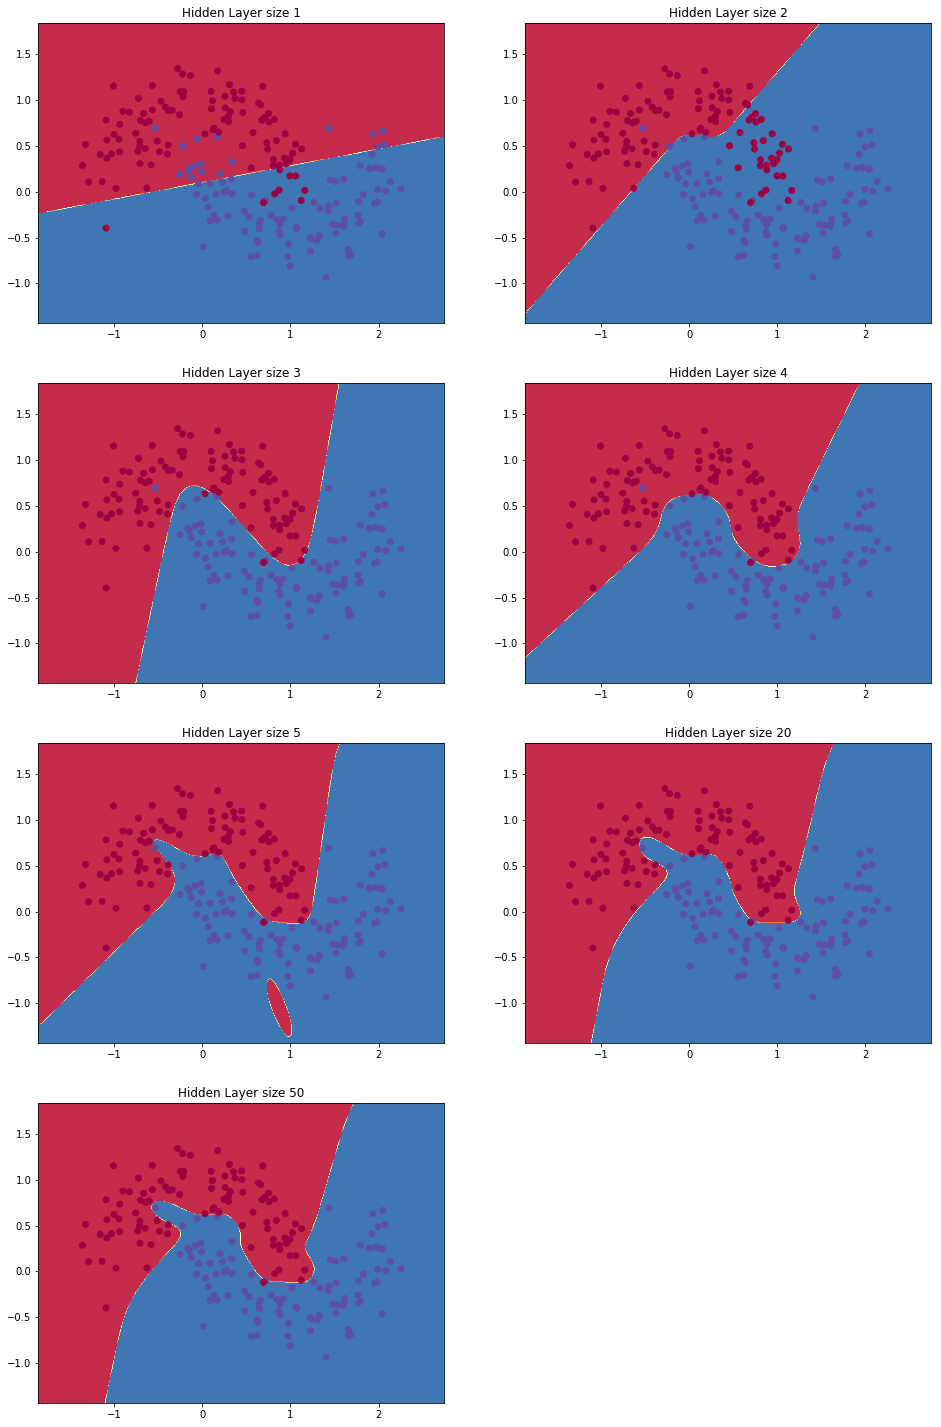

In [8]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

Ta có thể thấy rằng hidden layer với số chiều thấp hơn sẽ nắm bắt xu hướng chung của dữ liệu tốt hơn. Số chiều càng cao thì khả năng bị <a href="https://ongxuanhong.wordpress.com/2015/10/04/ky-nang-lam-viec-voi-machine-learning/" target="_blank" rel="noopener noreferrer">overfitting</a> càng lớn. Nếu ta sử dụng phương pháp <a href="https://ongxuanhong.wordpress.com/2015/08/25/danh-gia-mo-hinh-model-evaluation/" target="_blank" rel="noopener noreferrer">đánh giá mô hình</a> bằng cách chia tập dữ liệu ban đầu thành tập huấn luyện và tập test, ta sẽ thấy mô hình với số node ở hidden layer ít hơn sẽ có điểm đánh giá cao hơn so với hidden layer có số node nhiều hơn. Trong thực tế, ta có thể tăng giá trị regularization để giảm overfitting. Tuy nhiên, việc lựa chọn số node đúng đắn sẽ tiết kiệm chi phí tính toán hơn.

<em><strong>Nguồn tham khảo:</strong></em>
<ul>
	<li><a href="http://www.kdnuggets.com/2016/05/implementing-neural-networks-javascript.html">Implementing Neural Networks in Javascript</a></li>
	<li><a href="http://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html">What is Softmax Regression and How is it Related to Logistic Regression?</a></li>
</ul>